<center>
    <h3>Programación - Grado en Ciencia de Datos</h3>
    <h3>Universitat Politècnica de València</h3>
    <h1>Práctica 1 - Parte I. Análisis de datos tabulados: delitos en la ciudad de Chicago</h1>
</center>

**Práctica realizada por:**
- Nombre de participante <- edítalo y poned los nombres de los participantes
- Nombre de participante (si sólo es 1 puedes borrar esta línea)

<a id='indice'></a>
## Índice
1. ### [Objetivos](#objetivos)
1. ### [Actividad 1: Cargar datos en un dataframe](#act1)
1. ### [Actividad 2: Datos faltantes](#act2)
1. ### [Actividad 3: Tipos de delito](#act3)
1. ### [Actividad 4: Crear columnas Day, Month y Hour](#act4)
1. ### [Actividad 5: Frecuencia de delitos en función del día, mes y hora](#act5)
1. ### [Actividad 6: Localización geográfica de los delitos](#act6)

<a id='objetivos'></a>
## Objetivos:
- Aprender a analizar y visualizar datos tabulados (estructurados en filas y columnas) mediante la realización de operaciones básicas (ordenación, selección, agrupamiento, agregación, ...)
- Aprender a usar los tipos de datos **DataFrame** y **Series** de la biblioteca pandas.
- Utilizar la interfaz orientada a objetos de la biblioteca **matplotlib** para representar gráficamente los datos del estudio.

<a id='act1'></a>
## ACTIVIDAD 1: Cargar datos en un DataFrame

Almacena el fichero `"Crimes_2014.csv"` en un dataframe de pandas y muestra las 5 primeras filas. El fichero contiene como separador de campos la coma (separador por defecto de la función `read_csv`).

[Volver al índice](#indice)

In [137]:
import pandas as pd
df = pd.read_csv('Crimes_2014.csv', delimiter=',')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10503710,HZ244646,08/01/2014 12:00:00 AM,056XX S RICHMOND ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,14.0,63,20,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
1,10505693,HZ247349,12/27/2014 12:00:00 PM,011XX W 102ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,34.0,73,11,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
2,10210043,HX560497,12/31/2014 07:50:00 AM,009XX N ST LOUIS AVE,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,27.0,23,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
3,10210122,HX507186,11/14/2014 06:10:00 PM,057XX S RACINE AVE,2025,NARCOTICS,POSS: HALLUCINOGENS,SIDEWALK,True,False,...,16.0,68,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
4,10395520,HZ131734,12/25/2014 12:01:00 AM,079XX S WESTERN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,18.0,70,08B,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN


<a id='act2'></a>
## ACTIVIDAD 2: Datos faltantes

Muestra las filas del dataset en las que falte algún valor. A continuación, borra dichas filas del dataframe.

> **Nota:** Puedes consultar el tutorial *Manejo de datos tabulados con pandas DataFrame* (fichero `pandas_dataframe.ipynb`) disponible en el apartado de *Tutoriales* de PoliformaT para ver cómo operar con datos faltantes.

[Volver al índice](#indice)

In [11]:
filas=df.isnull().any(axis='columns')
df.loc[filas]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10503710,HZ244646,08/01/2014 12:00:00 AM,056XX S RICHMOND ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,14.0,63,20,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
1,10505693,HZ247349,12/27/2014 12:00:00 PM,011XX W 102ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,34.0,73,11,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
2,10210043,HX560497,12/31/2014 07:50:00 AM,009XX N ST LOUIS AVE,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,27.0,23,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
3,10210122,HX507186,11/14/2014 06:10:00 PM,057XX S RACINE AVE,2025,NARCOTICS,POSS: HALLUCINOGENS,SIDEWALK,True,False,...,16.0,68,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
4,10395520,HZ131734,12/25/2014 12:01:00 AM,079XX S WESTERN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,18.0,70,08B,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274318,10503527,HZ244449,11/14/2014 08:00:00 AM,013XX W 14TH ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,"SCHOOL, PUBLIC, GROUNDS",False,False,...,2.0,28,26,NaN,NaN,2014,04/29/2016 03:47:33 PM,NaN,NaN,NaN
274319,10210156,HX149534,02/13/2014 09:20:00 AM,011XX N CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,37.0,25,16,NaN,NaN,2014,04/30/2016 03:49:39 PM,NaN,NaN,NaN
274732,10503740,HZ244554,12/01/2014 12:01:00 AM,003XX N JEFFERSON ST,1261,DECEPTIVE PRACTICE,UNAUTHORIZED VIDEOTAPING,APARTMENT,False,False,...,42.0,28,11,NaN,NaN,2014,04/30/2016 03:51:13 PM,NaN,NaN,NaN
274733,10504998,HZ246118,10/10/2014 09:00:00 AM,021XX W 21ST ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,25.0,31,11,NaN,NaN,2014,05/01/2016 03:47:06 PM,NaN,NaN,NaN


In [13]:
df.dropna(axis='rows',how='any', inplace=True)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
65,9523078,HX178366,03/09/2014 06:20:00 PM,019XX S TRUMBULL AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,24.0,29,18,1153727.0,1890321.0,2014,05/04/2016 03:48:23 PM,41.854876,-87.711240,"(41.854876484, -87.711239739)"
70,9594486,HX244852,05/01/2014 08:54:00 PM,016XX N LECLAIRE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,37.0,25,18,1142297.0,1910603.0,2014,02/10/2018 03:50:01 PM,41.910752,-87.752690,"(41.910752373, -87.752689622)"
71,9594491,HX244418,05/01/2014 03:43:00 PM,035XX W LEXINGTON ST,2860,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,OTHER,False,False,...,24.0,27,24,1152995.0,1896476.0,2014,02/10/2018 03:50:01 PM,41.871781,-87.713763,"(41.871781022, -87.713763476)"
72,9594497,HX244885,05/01/2014 09:00:00 PM,070XX N GLENWOOD AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,49.0,1,18,1165665.0,1946909.0,2014,02/10/2018 03:50:01 PM,42.009911,-87.665805,"(42.00991135, -87.665804947)"
73,9594499,HX244817,05/01/2014 08:00:00 PM,059XX S ELIZABETH ST,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,16.0,67,08A,1169008.0,1865298.0,2014,02/10/2018 03:50:01 PM,41.785893,-87.655876,"(41.785893321, -87.655876058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274727,21747,HX388214,08/15/2014 11:14:00 AM,084XX S GILBERT CT,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,21.0,71,01A,1172950.0,1848457.0,2014,03/19/2019 04:11:22 PM,41.739593,-87.641919,"(41.739593426, -87.641919138)"
274728,21754,HX435403,09/20/2014 02:46:00 AM,073XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,17.0,68,01A,1172236.0,1856258.0,2014,03/19/2019 04:11:22 PM,41.761016,-87.644306,"(41.76101609, -87.64430623)"
274729,21986,HX470605,10/17/2014 03:05:00 AM,045XX W PARKER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,31.0,20,01A,1145657.0,1917861.0,2014,03/18/2019 04:08:09 PM,41.930606,-87.740162,"(41.930605964, -87.740161629)"
274730,21987,HX470605,10/17/2014 01:05:00 AM,045XX W PARKER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,31.0,20,01A,1145657.0,1917861.0,2014,03/19/2019 04:11:22 PM,41.930606,-87.740162,"(41.930605964, -87.740161629)"


<a id='act3'></a>
## ACTIVIDAD 3: Tipos de delito

> **Nota:** Puedes consultar el tutorial *Introducción a la visualización de datos con matplotlib* (fichero `introduccion_matplotlib.ipynb`) disponible en el apartado de *Tutoriales* de PoliformaT para ver cómo crear figuras con matplotlib utiizando la interfaz orientada a objetos.

1. Muestra los distintos tipo de delito registrados. Para ello, selecciona la columna 'Primary Type' y ejecuta la función `unique()` sobre esta selección para mostrar únicamente un elemento de cada tipo.
1. Muestra un diagrama de barras horizontal con el número de delitos de cada tipo. Para ello:
    1. Usa `value_counts` para contar cuántos delitos hay de cada tipo. Esta función devuelve un objeto de tipo `Series`, en el que el atributo `index` son las etiquetas de la serie (tipos de delito) y el atributo `values` los valores.
    1. Ordena la serie anterior de manera ascendente.
    1. Crea y muestra una gráfica de barras horizontal con el método `barh` aplicado a un objeto de tipo `Axes`. El primer parámetro deberá ser los tipos de delito y el segundo las cantidades. El objeto `Axes` se devuelve, junto a la figura de la que forma parte, cuando llamas a `plt.suplots()`:
    ```
    fig, ax = plt.subplots()
    ```    
    1. Personaliza la figura:
    
        - Utiliza `figsize` para adecuar el tamaño. Puedes pasarlo como valor a la llamada:
        
        ```
        fig, ax = plt.subplots(figsize=(10,10))
        ```       
        
        - Utiliza el método `ax.grid(axis='x')` para mostrar las líneas verticales de una rejilla.
        - Utiliza el método `ax.set_title` para poner un título a la gráfica.
                
[Volver al índice](#indice)

In [27]:
s = df['Primary Type']
delitos=s.unique()
s.unique()

array(['NARCOTICS', 'PUBLIC PEACE VIOLATION', 'ASSAULT', 'BATTERY',
       'THEFT', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'OTHER OFFENSE',
       'CRIMINAL TRESPASS', 'SEX OFFENSE', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'MOTOR VEHICLE THEFT', 'OFFENSE INVOLVING CHILDREN', 'BURGLARY',
       'LIQUOR LAW VIOLATION', 'CRIM SEXUAL ASSAULT', 'KIDNAPPING',
       'PROSTITUTION', 'ARSON', 'STALKING', 'INTIMIDATION', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'GAMBLING', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [21]:
nDelitos = s.value_counts()
nDelitos.sort_values(ascending=False)

THEFT                                61230
BATTERY                              49318
NARCOTICS                            28847
CRIMINAL DAMAGE                      27708
OTHER OFFENSE                        16893
ASSAULT                              16855
DECEPTIVE PRACTICE                   14826
BURGLARY                             14543
MOTOR VEHICLE THEFT                   9877
ROBBERY                               9775
CRIMINAL TRESPASS                     7518
WEAPONS VIOLATION                     3108
PUBLIC PEACE VIOLATION                2891
OFFENSE INVOLVING CHILDREN            2269
PROSTITUTION                          1620
INTERFERENCE WITH PUBLIC OFFICER      1393
CRIM SEXUAL ASSAULT                   1261
SEX OFFENSE                            900
HOMICIDE                               426
ARSON                                  396
LIQUOR LAW VIOLATION                   394
GAMBLING                               393
KIDNAPPING                             220
STALKING   

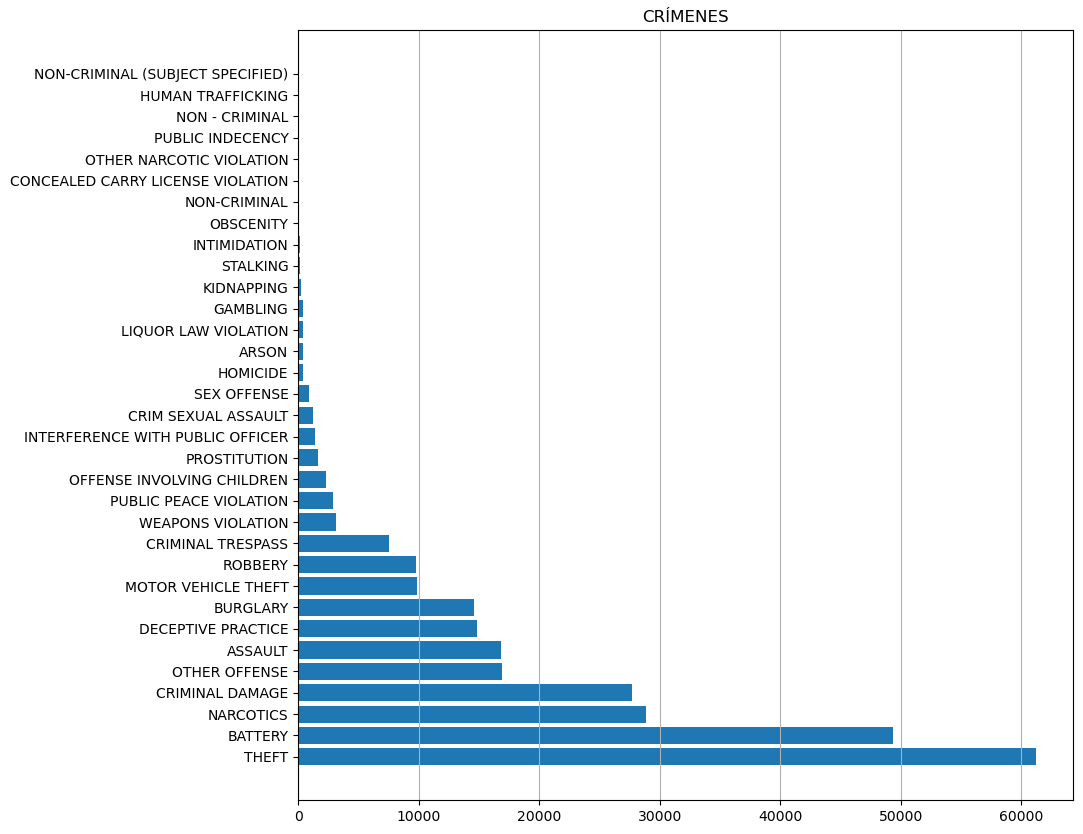

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
t = nDelitos.index
h = nDelitos.values
ax.barh(t,h)
ax.grid(axis='x')
ax.set_title('CRÍMENES')
None

<a id='act4'></a>
## ACTIVIDAD 4: Crear columnas Day, Month y Hour

En el dataframe cargado, el campo 'Date' contiene la fecha del delito en formato "mm/dd/aaaa hh:mm:ss AM|PM". Si queremos analizar los datos en función del día, el mes, la hora, etc., conviene separar este campo y crear columnas específicas para el día, el mes, etc. Esto puede hacerse mediante las funciones `map` o `apply`. La segunda es más flexible y potente, pero muy lenta para dataframes con muchas filas, por lo que usaremos la primera.

1. Consulta el tutorial `pandas_dataframe.ipynb` mencionado anteriormente para entender el uso de la función `map`.
1. Implementa las funciones `get_dia` y `get_hora` de modo similar a como está implementada `get_mes`. La función `get_hora` debe, además, convertir la hora de formato 12h a formato 24h. Para ello, en primer lugar se deberá dejar la hora en el rango [0-11] mediante la operación `%12`y, a continuación, si el último campo de la fecha es 'PM', se deberá sumar 12 a este valor.

    > **Nota:** No se pide `get_año` porque el dataframe ya tiene un campo `Year`.

1. Utiliza la función `map` para crear en el dataframe las nuevas columnas 'Day', 'Month' y 'Hour'
1. Muestra las primeras filas del dataframe resultante y comprueba que se hayan creado correctamente las nuevas columnas.

[Volver al índice](#indice)

In [92]:
import re

def get_mes(fecha):
    '''
    Recibe una fecha con formato "mm/dd/aaaa hh:mm:ss AM|PM"
    Devuelve el mes mm convertido a tipo int
    '''
    items =  re.split(':|/| ', fecha)  # Lista con cada uno de los campos que componen la fecha por separado  
    return int(items[0])

def get_dia(valor):
    a = valor.split()
    b = a[0]
    b = b.split('/')
    c = b[1]
    return int(c)

def convertir(hora):
    a = hora.split(':')
    b = a[0]
    if b=='12':
        b = '0'
    return b

def get_hora(valor):
    a = valor.split()
    b = a[1]
    c = a[2]
    d = int(convertir(b))
    if c == 'PM':
        d = d +12
    return d
    

In [120]:
df['Día'] = df['Date'].map(get_dia)
df['Mes'] = df['Date'].map(get_mes)
df['Hora'] = df['Date'].map(get_hora)

In [121]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Día,Mes,Hora,Hora2
65,9523078,HX178366,03/09/2014 06:20:00 PM,019XX S TRUMBULL AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,1890321.0,2014,05/04/2016 03:48:23 PM,41.854876,-87.711240,"(41.854876484, -87.711239739)",9,3,18,18
70,9594486,HX244852,05/01/2014 08:54:00 PM,016XX N LECLAIRE AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,1910603.0,2014,02/10/2018 03:50:01 PM,41.910752,-87.752690,"(41.910752373, -87.752689622)",1,5,20,20
71,9594491,HX244418,05/01/2014 03:43:00 PM,035XX W LEXINGTON ST,2860,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,OTHER,False,False,...,1896476.0,2014,02/10/2018 03:50:01 PM,41.871781,-87.713763,"(41.871781022, -87.713763476)",1,5,15,15
72,9594497,HX244885,05/01/2014 09:00:00 PM,070XX N GLENWOOD AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,1946909.0,2014,02/10/2018 03:50:01 PM,42.009911,-87.665805,"(42.00991135, -87.665804947)",1,5,21,21
73,9594499,HX244817,05/01/2014 08:00:00 PM,059XX S ELIZABETH ST,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,1865298.0,2014,02/10/2018 03:50:01 PM,41.785893,-87.655876,"(41.785893321, -87.655876058)",1,5,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274727,21747,HX388214,08/15/2014 11:14:00 AM,084XX S GILBERT CT,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,1848457.0,2014,03/19/2019 04:11:22 PM,41.739593,-87.641919,"(41.739593426, -87.641919138)",15,8,11,11
274728,21754,HX435403,09/20/2014 02:46:00 AM,073XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1856258.0,2014,03/19/2019 04:11:22 PM,41.761016,-87.644306,"(41.76101609, -87.64430623)",20,9,2,2
274729,21986,HX470605,10/17/2014 03:05:00 AM,045XX W PARKER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,1917861.0,2014,03/18/2019 04:08:09 PM,41.930606,-87.740162,"(41.930605964, -87.740161629)",17,10,3,3
274730,21987,HX470605,10/17/2014 01:05:00 AM,045XX W PARKER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,1917861.0,2014,03/19/2019 04:11:22 PM,41.930606,-87.740162,"(41.930605964, -87.740161629)",17,10,1,1


<a id='act5'></a>
## ACTIVIDAD 5: Frecuencia de delitos en función del día, mes y hora

Una vez creadas las columnas Day, Month, Year y Hour, podemos analizar los datos en función de estas variables. 

- Muestra gráficas de barras verticales del número de delitos en función de la hora, día y mes, con el objetivo de detectar si hay alguna relación entre estas variables y la actividad delictiva.
- Muestra también una gráfica de barras del número de delitos en función del mes, en este caso particularizado únicamente para los delitos relacionados con el juego (`Primary Type = GAMBLING`).
- Muestra las cuatro gráficas en una sola figura. Consulta los tutoriales mencionados anteriormente para ver cómo crear múltiples gráficas en una sola figura.

[Volver al índice](#indice)

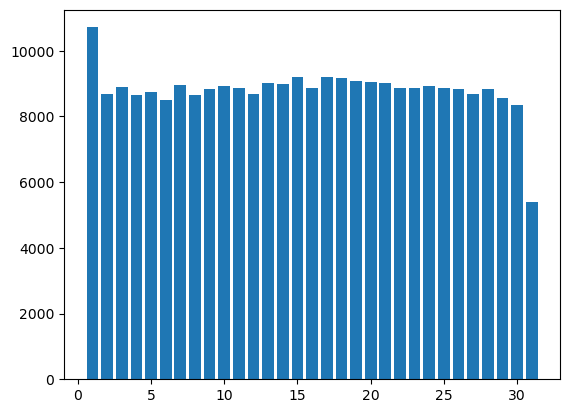

In [117]:
dias = df['Día'].value_counts()
fig, ax = plt.subplots()
ax.bar(dias.index,dias.values)
None

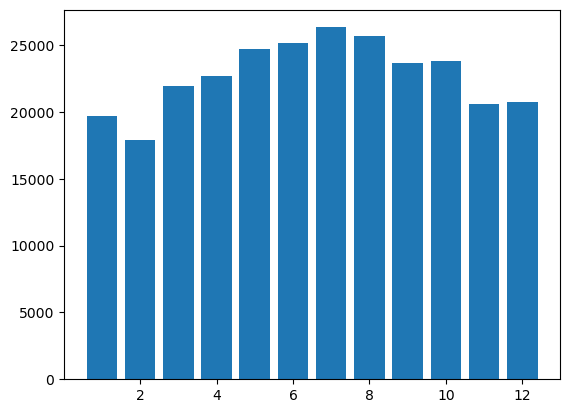

In [118]:
mes = df['Mes'].value_counts()
fig, ax = plt.subplots()
ax.bar(mes.index,mes.values)
None

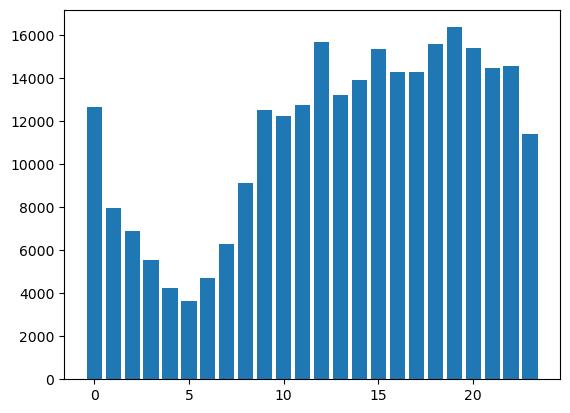

In [122]:
hora = df['Hora'].value_counts()
fig, ax = plt.subplots()
ax.bar(hora.index,hora.values)
None

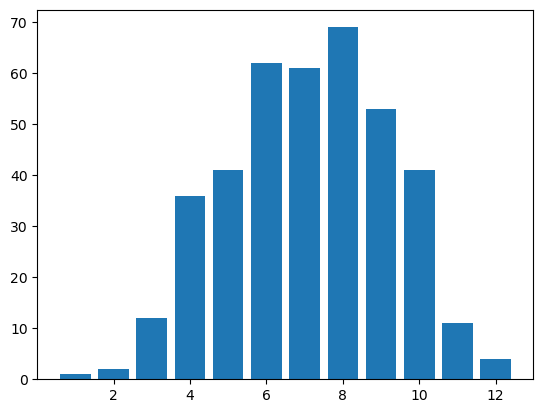

In [131]:
selec = df['Primary Type'] == 'GAMBLING'
s = df[selec]['Mes'].value_counts()
fig, ax = plt.subplots()
ax.bar(s.index, s.values)
None

<a id='act6'></a>
## ACTIVIDAD 6: Localización geográfica de los delitos

Con el fin de visualizar la distribución geográfica de los delitos, muestra un *scatter plot* con las variables 'Latitude' frente a 'Longitude'. 

1. Utiliza el método `ax.scatter(x,y)` aplicado sobre un objeto `ax` de tipo `Axes` para generar el gráfico, donde `x` debe ser la longitud e `y` la latitud.
1. Observa que el tamaño de los puntos es excesivamente grande en relación al tamaño de la gráfica. Para corregirlo, añade el parámetro `s=0.01` en la llamada al método `scatter` para cambiar el tamaño de los puntos, y añade el parámetro `figsize=(10, 10)` a `plt.subplots` para cambiar el tamaño de la figura.
1. Con el fin de comprobar si ciertos delitos se localizan en puntos concretos de la ciudad, sobreimprime otro *scatter plot* con la geolocalización de los delitos de juego (`Primary Type = GAMBLING`). Pon el tamaño del punto a 1 y el color magenta (`s=1, c='magenta'` en `ax.scatter`).
1. Haz lo mismo para los delitos de prostitución (`Primary Type = PROSTITUTION`). Pon el tamaño del punto a 1 y el color `'red'`.

[Volver al índice](#indice)

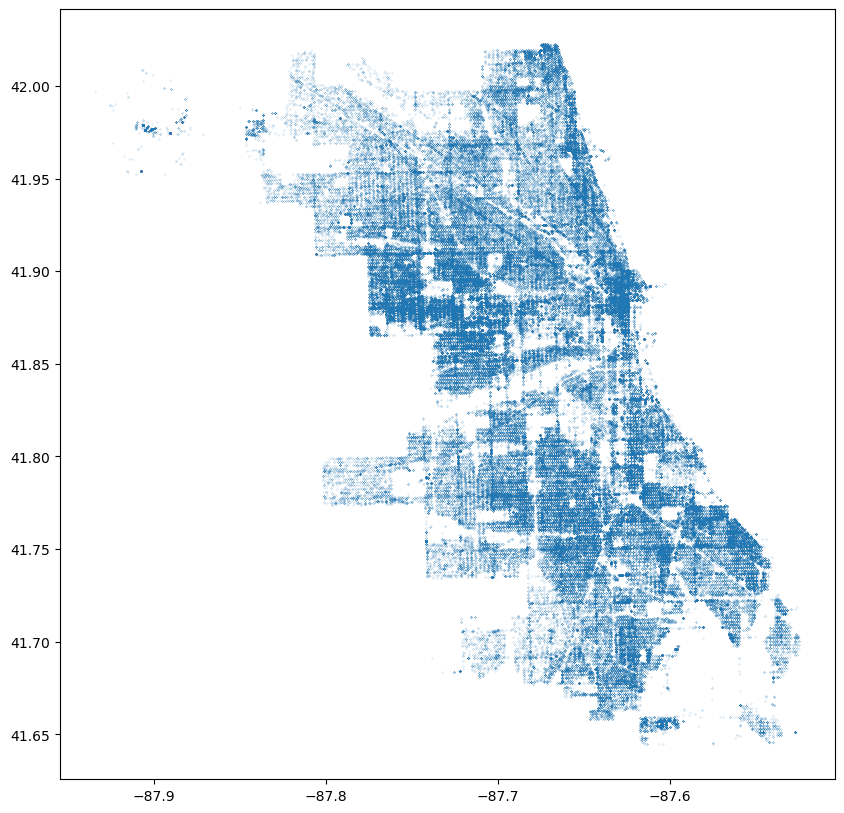

In [136]:
x = df['Longitude'].values
y = df['Latitude'].values
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x,y,s=0.01)
None

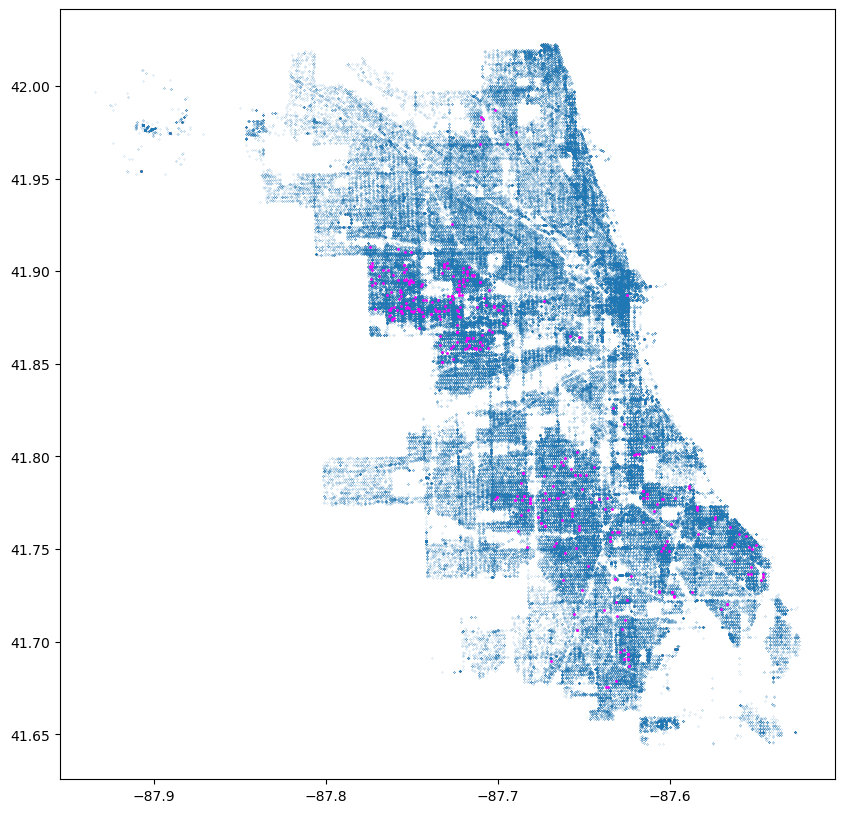

In [169]:
g = df[df['Primary Type'] == 'GAMBLING']
xg = g['Longitude'].values
yg = g['Latitude'].values
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x,y,s=0.01)
ax.scatter(xg, yg, s=1, c='magenta')
None

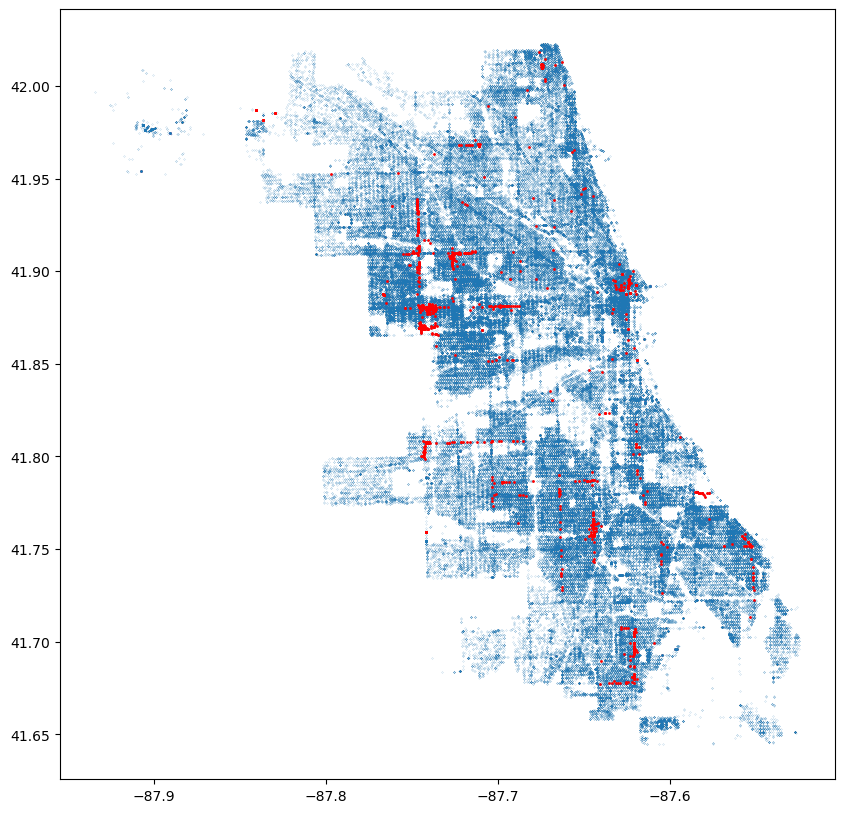

In [170]:
p = df[df['Primary Type'] == 'PROSTITUTION']
xp = p['Longitude'].values
yp = p['Latitude'].values
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x,y,s=0.01)
ax.scatter(xp, yp, s=1, c='red')
None